##Regression
### 1. Implement LMS algorithm for linear regression from scratch. Visualize the learnt house prices on the scatter plot of the input training dataset

In [14]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split

In [15]:
# Getting the dataset uploaded on GitHub
url = 'https://raw.githubusercontent.com/Harshvg101/Harshvg101/main/ex1data2.txt' 
# Reading the Dataset from the ex1data2.txt file
df = pd.read_csv(url, sep=',', header=None)
df = df-df.mean() 
df = df/df.std()

df.insert(0, 'bias', 1)
df.columns = ['bias', 'Area', 'Bedrooms', 'Standardized Price']
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


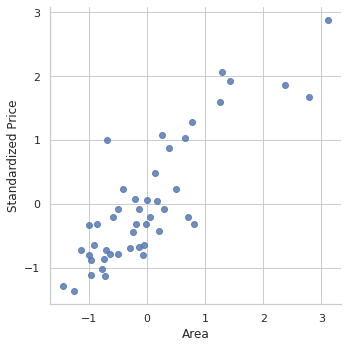

In [16]:
# Plotting standardized Price v/s Area : (Read data)
sns.set(style='whitegrid', context='notebook')
sns.lmplot(x='Area', y='Standardized Price', data=df, fit_reg=False)

In [17]:
# Making the Gradient Descent Class

class Batch_gradient_descent :
  def __init__(self, x, y, alpha, max_iterations, epsln, theta_seed=None) : 
    self.x = x
    self.y = y
    self.alpha = alpha
    self.max_iterations = max_iterations
    self.epsln = epsln
    if(theta_seed is not None) :
      self.theta = theta_seed 
    else :
      self.theta = np.random.randn(x.shape[0]+1, 1)

  def h(self, x, temp_theta=None) :
    if(temp_theta is None) :
      temp_theta = self.theta

    if(len(x)==len(temp_theta)-1) :
      x = np.insert(x, 0, 1) 

    return np.dot(temp_theta, x)

  # Cost function to calculate Mean Square Loss
  def cost_fn(self, ) :
    cost = 0
    for i in range(len(self.x)) :
      cost += (self.h(self.x[i]) - self.y[i])**2  # Mean square loss

    cost /= 2*len(self.x)

    return cost

  # train function to train the model
  def train(self, ) :
    costs = []
    thetas = []

    thetas.append(self.theta)
    costs.append(self.cost_fn())

    # Update theta and gradient (grad)
    for i in range(self.max_iterations) :
      theta_update = self.theta.copy()
      for j in range(len(theta_update)) :
        grad = 0 
        for k in range(len(self.x)) :
          # updating the gradient
          grad += (self.h(self.x[k]) - self.y[k])*self.x[k][j]

        # Updating theta
        theta_update[j] -= self.alpha*grad/len(self.x) 

      self.theta = theta_update 

      thetas.append(self.theta)
      costs.append(self.cost_fn())
      if(abs(costs[i+1]-costs[i]) < self.epsln) :
        break 

    return self.theta, thetas, costs

  # testing function to test the trained model
  def testing(self, X_test, Y_test) :
      
      loss=0 
      for i in range(len(X_test)) :
        loss += (self.h(X_test[i]) - Y_test[i])**2

      loss /= 2*len(X_test)
      return loss

In [18]:
theta = np.random.randn(3)
alpha = 0.05
bgd = Batch_gradient_descent(X_train, Y_train, alpha, 10000, 0.0001, theta)
theta, thetas, costs = bgd.train()
total_iters = len(costs)

print(total_iters)
loss_on_test = bgd.testing(X_test, Y_test)
print(loss_on_test)

133
0.20680512702149817


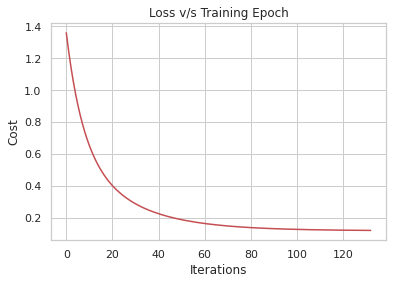

In [19]:
# Plotting the Cost(Loss)
plt.plot(np.arange(total_iters), costs, 'r')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Loss v/s Training Epoch')
plt.show()

[-0.03502826  0.73261712  0.07422874]


Text(0.5, 0.92, '3D Scatter Plot')

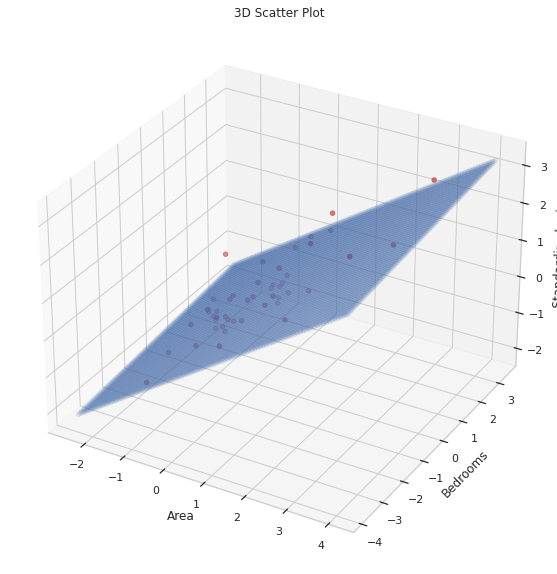

In [20]:
# Plotting the 3D scatter plot for Bedrooms vs Area vs Price:

print(theta)
XY_axis = df[['Area', 'Bedrooms']].values.reshape(-1, 2)

x_ = XY_axis[:, 0]
y_ = XY_axis[:, 1]
z_ = df['Standardized Price']

x_min = x_.min()-1
x_max = x_.max()+1
y_min = y_.min()-1
y_max = y_.max()+1

# creating a meshgrid for the plot
x_ax, y_ax = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

mesh_pt = np.c_[x_ax.ravel(), y_ax.ravel()]
z_ax = pd.DataFrame([bgd.h(mesh_pt[i]) for i in range(len(mesh_pt))]) 

fig = plt.figure(figsize=(10, 10))
plot = fig.add_subplot(111, projection='3d')
plot.scatter(x_, y_, z_, c='r', marker='o')
plot.scatter(mesh_pt[:,0], mesh_pt[:,1], z_ax, c='b', marker='o', alpha=0.1)

plot.set_xlabel('Area')
plot.set_ylabel('Bedrooms')
plot.set_zlabel('Standardized price')
plot.set_title('3D Scatter Plot')